In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('census_income.csv')
data.dropna(inplace=True)

# Plotting and Statistical Testing

In this section, we will go over some basic plots we can perform with `matplotlib`. This will involve quite a bit of review of content from the section on using `matplotlib` in the Python Programming Guide.

At a basic level, there are a few plots that are widely used in EDAs and for analyses in general. These plots depend on the data that you want to include in the plot, and we will go over some of the main types here.

## Plotting

### One Numerical Variable: Histograms

When visualizing one single numerical variable, you will want to use a histogram. Histograms visualize the frequency of each value across a numerical variable and give you a sense of how the instances are distributed. This in turn can give insight about how likely certain values might be; to find out more about probability distributions, look to the Probability and Statistical Inference sections.

For now, let's make a histogram of the `age` column.

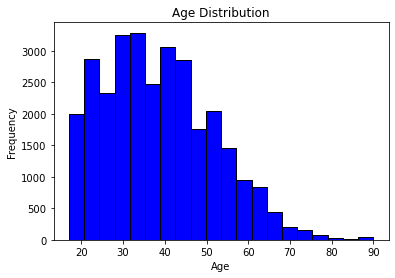

In [9]:
#make a histogram of the age column
plt.hist(data['age'], bins=20, color='blue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In making our plot, note that we added labels to each axis and a title to the plot. This is important as our graphs should be able to stand alone and still be somewhat understandable. 

We can see that the distribution of ages is skewed right (values tend to be lower) but with a few outliers corresponding to the very elderly.

:::{admonition} Exercise 3.1
Make another histogram corresponding to a different variable.
:::

### One Categorical Variable: Count Plots

To look at the distribution of one categorical variable, we use count plots. These will correspond to the number of instances of each category in a variable, with one bar for each category. While this is possible with `matplotlib`, the `seaborn` package makes for easier and nicer plots much of the time, and this is a case where it is very helpful. It is often used in conjunction with `matplotlib` as well, and we will see that below.

Here, let's make a bar plot of the `education` column.

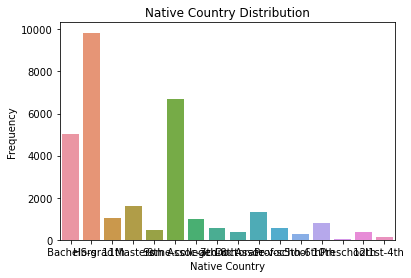

In [10]:
#make a bar plot of the education column
import seaborn as sns

sns.countplot(x = data['education'])
plt.title('Education Level Distribution')
plt.xlabel('Education Level')
plt.ylabel('Frequency')
plt.show()

An unfortunate reality of countplots is that they will collide labels with each other for variables with a lot of categories. Fortunately, this is where the collaboration between `seaborn` and `matplotlib` can shine, because the latter allows for rotating the ticks on the axes.

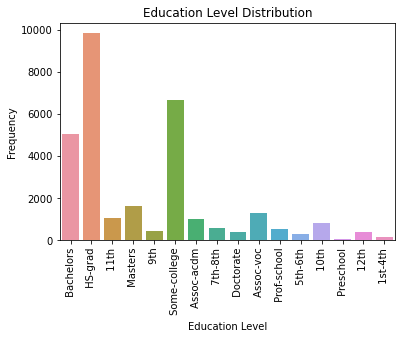

In [13]:
sns.countplot(x = data['education'])
plt.title('Education Level Distribution')
plt.xticks(rotation=90)
plt.xlabel('Education Level')
plt.ylabel('Frequency')
plt.show()

Much more readable now, but it's easier to read these labels when they are in their normal positions. How about we rotate this entire graph instead?

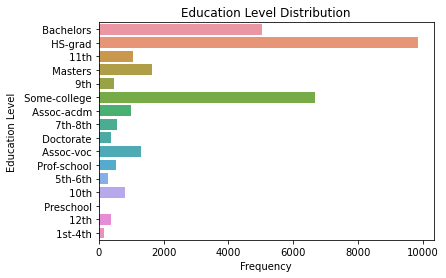

In [14]:
sns.countplot(y = data['education'])
plt.title('Education Level Distribution')
plt.ylabel('Education Level')
plt.xlabel('Frequency')
plt.show()

And that's how it's done. We've just gone from a jumble of pixels to a very professional-looking plot with a few iterations. The lesson here (aside from learning about countplots) is to not be afraid to experiment! This whole process is called *exploratory* for a reason!

:::{admonition} Exercise 3.2
Make another countplot corresponding to a different variable. Adjust it so it looks professional.
:::

### Two Numerical Variables: Scatterplots

Scatterplots are so called because they scatter points across an (x, y) plane. As such, you need points with two numerical variables in order to do this. Here, let's look at `age` versus `hours-per-week`.

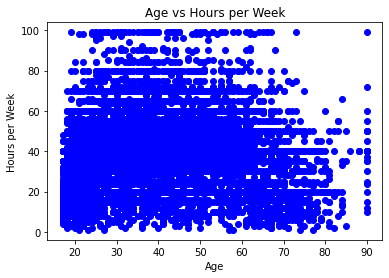

In [15]:
#make a scatterplot of age on the x-axis and hours-per-week on the y-axis.
plt.scatter(data['age'], data['hours-per-week'], color='blue')
plt.title('Age vs Hours per Week')
plt.xlabel('Age')
plt.ylabel('Hours per Week')
plt.show()

Whoa, that's a bit much. Can we reduce the size of the dots?

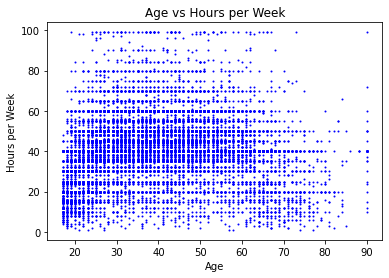

In [16]:
#same as before, but reduce the size of the dots
plt.scatter(data['age'], data['hours-per-week'], color='blue', s=1)
plt.title('Age vs Hours per Week')
plt.xlabel('Age')
plt.ylabel('Hours per Week')
plt.show()

Definitely looks a lot better. 

Plots like this help you to visualize numerical relationships between variables, such as correlation. Unfortunately, it doesn't seem like there's a strong correlation here at first glance, especially if you kept the default dot size. But now, with smaller dots, we can kind of see that the number of hours per week increases slightly for adults from children then decreases for the elderly.

:::{admonition} Exercise 3.3
Make another scatterplot with two other variables of your choosing. Make sure it looks presentable!
:::

### One Categorical, One Numerical: Boxplots

Boxplots, or box-and-whisker plots, help you to look at the distributions of a numerical variable when split along the categories of a categorical variable. Here, let's try it with the `age` and `sex` variables; again, we will turn to `seaborn`.

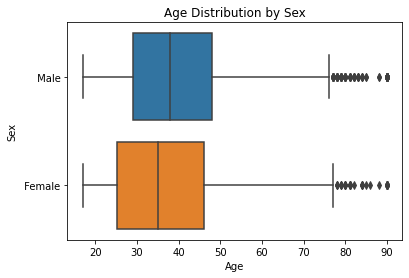

In [17]:
#use seaborn to make a boxplot of age, broken down by sex
sns.boxplot(x = data['age'], y = data['sex'])
plt.title('Age Distribution by Sex')
plt.xlabel('Age')
plt.ylabel('Sex')
plt.show()

Here we can see that the distributions for ages between men and women are somewhat similar. Further statistical investigation would be needed to confirm this, though. 

:::{admonition} Exercise 3.4
Make another boxplot between variables of your choosing. Make sure it looks presentable.
:::

## Statistical Testing

While visualizations look good and can sometimes give us information on various dataset attributes, they can be augmented by mathematical techniques to acquire more quantitative insights. These mathematical techniques are known as statistical tests; there are a variety of them and their usage depends largely on the number of variables analyzed and the distribution of the tested groups. 

When performing a statistical test, we assume a *null hypothesis* $H_0$. Following this, the probability of the instances we have is calculated; this probability becomes a p-value. For sufficiently low p-values, we can reject the null hypothesis; this threshold is typically $ p < 0.05$. In other words, getting a low enough p-value means that the null hypothesis is unlikely to be correct.

:::{warning} This is a massive simplification of the actual theory behind statistical testing. For more on the theory of statistical testing, refer to the Statistical Inference section.
:::

The tests covered in this section are mainly for numerical data, and we will look at two widely used tests to compare groups: the two-sample t-test and ANOVA.

### T-tests

When performing a t-test to compare two samples, you first assume the null hypothesis that the mean values for these two samples are equal; in other words, that there is no difference between the groups. You then want to acquire those two samples and then use those samples to find the p-value. The actual theory is not important here as there are many assumptions we are overlooking.

Here, let's look at the `captial-gain` variable split between sex.

In [27]:
#t-test for captial-gain between sex
from scipy import stats

#split the groups
m = data[data['sex'] == " Male"]['capital-gain']
f = data[data['sex'] == " Female"]['capital-gain']

#perform the t-test
t, p = stats.ttest_ind(m, f)
print("t-value:", t)
print("p-value:", p)

t-value: 8.487476444760196
p-value: 2.2070076201365698e-17


This shows that there is a significant difference between the captial gains between men and women in this dataset. 

:::{admonition} Exercise 3.5
Make plots to visualize this difference and see if the conclusion of the t-test makes sense.
:::

:::{admonition} Exercise 3.6
Perform another t-test in the style of your choosing. Report the t-value and p-value, and supply plots to justify this difference.

### ANOVA

Analysis of Variance (more often abbreviated as ANOVA) tests are extensions of t-tests in that while t-tests compare two groups, ANOVA can compare 3 or more groups. It assumes the null hypothesis that there is no difference between the means of all of the groups; that is, there is no difference between all of the groups. Again, there is a lot of theory we are overlooking, but for practicality's sake, this is sometimes permissible.

Here, let's split the `capital-gains` variable across the `education` category.

In [31]:
#anova for capital-gains split by education
import statsmodels.api as sm
from statsmodels.formula.api import ols

#there is an error in the data that will cause the anova to fail
#capital-gain needs to be replaced with capital_gain
#otherwise the ANOVA will read this as a minus sign
data.rename(columns={'capital-gain':'capital_gain'}, inplace=True)
data.head()

#perform the anova
model = ols('capital_gain ~ education', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                 sum_sq       df          F         PR(>F)
education  6.886420e+10     15.0  87.285486  4.079945e-264
Residual   1.585586e+12  30146.0        NaN            NaN


Our ANOVA result outputs a table. For basic purposes, the most important result is the one in the last column, the PR(>F) value. This is a very low p-value, so preliminarily we would say that there are significant differences between capital gains by education levels.

:::{admonition} Exercise 3.7
Does the test tell us where the significant difference lies?
:::

::{admonition} Exercise 3.8
Perform another ANOVA test of your choosing.
:::

## EDA Project

Find another dataset of your choosing on the internet and perform some of the techniques described in this basic EDA part of the chapter. Make sure your results are presentable and that you add some textual description to them.

Common places to find data include:
- UC Irvine Machine Learning Repository, https://archive.ics.uci.edu/
- Kaggle, https://www.kaggle.com/
- The GitHub Repository of Awesome Public Datasets, https://github.com/awesomedata/awesome-public-datasets
- KDNuggets, which links many more data sources: https://www.kdnuggets.com/datasets/index.html
